In [1]:
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import scipy.stats as stats
import numpy as np

In [4]:
um_norm = pd.read_csv('../data/normalized_usage_matrix_fmba_TRB_v.csv').drop(columns=['Unnamed: 0', 'run', 'project', 'covid'])

In [5]:
um_norm

,TRBV13,TRBV6-4,TRBV6-7,TRBV5-4,TRBV7-1,TRBV6-8,TRBV16,TRBV10-2,TRBV4-3,TRBV5-5,...,TRBV7-8,TRBV12-1,TRBV29-1,TRBV5-7,TRBV6-1,TRBV7-7,TRBV25-1,TRBV21-1,TRBV18,TRBV10-1
0,0.004141,0.014080,0.001035,0.020810,0.0,0.000311,0.000000,0.008489,0.000000,0.012217,...,0.014184,0.000828,0.023812,0.002174,0.043483,0.003831,0.005694,0.017911,0.026504,0.008593
1,0.005861,0.021489,0.001028,0.019741,0.0,0.000308,0.000000,0.006375,0.024368,0.008431,...,0.015937,0.001028,0.022414,0.001542,0.028686,0.004730,0.008123,0.016245,0.026527,0.013366
2,0.005870,0.013209,0.001468,0.018987,0.0,0.001743,0.000000,0.005412,0.000183,0.011374,...,0.015869,0.000734,0.018896,0.000917,0.042836,0.002385,0.006971,0.023298,0.031829,0.006513
3,0.005943,0.012335,0.001121,0.019399,0.0,0.000673,0.000000,0.003813,0.000000,0.010428,...,0.014577,0.000785,0.023211,0.000673,0.038574,0.005607,0.009307,0.020072,0.030724,0.009195
4,0.005285,0.010469,0.001525,0.022665,0.0,0.000711,0.000000,0.004777,0.013213,0.010367,...,0.015144,0.000711,0.022258,0.001220,0.033235,0.002947,0.006301,0.019311,0.019819,0.006606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,0.006193,0.010669,0.001515,0.025580,0.0,0.000909,0.000000,0.002154,0.026421,0.009996,...,0.017132,0.000909,0.019454,0.000707,0.030258,0.003972,0.012420,0.017064,0.024839,0.005924
1221,0.005606,0.015632,0.001570,0.021348,0.0,0.000457,0.000018,0.002283,0.020124,0.009313,...,0.013568,0.000749,0.022553,0.000530,0.026735,0.004492,0.012783,0.017275,0.025110,0.005424
1222,0.007796,0.015066,0.001078,0.019579,0.0,0.001053,0.000000,0.006443,0.016546,0.008874,...,0.014590,0.001128,0.020506,0.001028,0.035598,0.004563,0.011908,0.018777,0.027651,0.011582
1223,0.007811,0.015333,0.001760,0.023084,0.0,0.000840,0.000000,0.008711,0.000060,0.009612,...,0.012192,0.001430,0.020844,0.000900,0.037566,0.004321,0.011472,0.020473,0.026124,0.013282


In [8]:
gene = 'TRBV7-9'

<Axes: xlabel='TRBV7-9', ylabel='Count'>

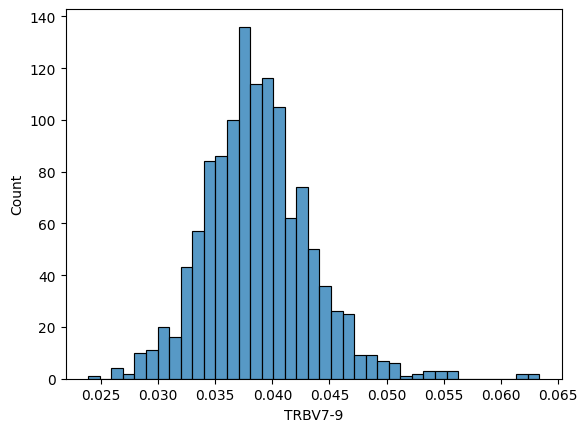

In [9]:
sns.histplot(um_norm[gene])

<Axes: xlabel='TRBV7-9', ylabel='Count'>

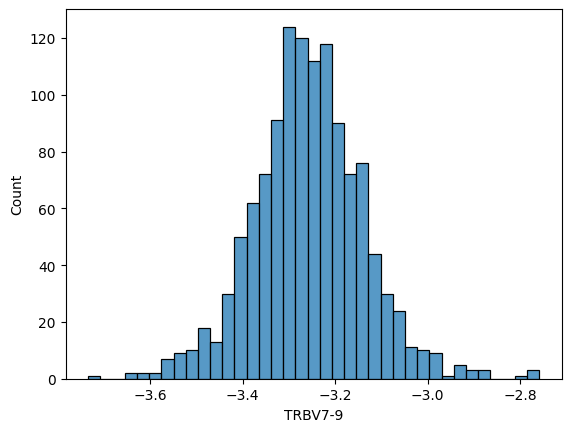

In [10]:
sns.histplot(np.log(um_norm[gene]))

In [11]:
stat, p_value = stats.shapiro(np.log(um_norm[gene]))
p_value

2.6371683042175493e-07

In [12]:
gene_to_pval = {}
gene_to_pval_init = {}
for gene in um_norm.columns:
    stat, p_value = stats.shapiro(um_norm[gene])
    gene_to_pval_init[gene] = p_value
    
    stat, p_value = stats.shapiro(np.log(um_norm[gene]))
    gene_to_pval[gene] = p_value

/home/evlasova/.conda/envs/bio2025/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/evlasova/.conda/envs/bio2025/lib/python3.12/site-packages/scipy/stats/_morestats.py:2011: RuntimeWarning: invalid value encountered in subtract
  y -= x[N//2]  # subtract the median (or a nearby value); see gh-15777


In [13]:
sum([1 for x in gene_to_pval_init.values() if x > 0.05/59])

5

In [14]:
sum([1 for x in gene_to_pval.values() if x > 0.05/59])

25

In [15]:
gene_to_pval

{'TRBV13': 0.17651506845279624,
 'TRBV6-4': 1.878918921175668e-14,
 'TRBV6-7': 1.0,
 'TRBV5-4': 2.0953653979433458e-16,
 'TRBV7-1': 1.0,
 'TRBV6-8': 1.0,
 'TRBV16': 1.0,
 'TRBV10-2': 7.462733555899055e-17,
 'TRBV4-3': 1.0,
 'TRBV5-5': 6.168980702631464e-20,
 'TRBV6-9': 1.0,
 'TRBV12-3': 0.001630548492651853,
 'TRBV7-4': 1.0,
 'TRBV7-3': 7.818119875965566e-21,
 'TRBV12-4': 1.0,
 'TRBV12-5': 4.4810232031738406e-17,
 'TRBV5-3': 1.0,
 'TRBV19': 1.0889525367378276e-10,
 'TRBV30': 1.0,
 'TRBV5-8': 1.0,
 'TRBV17': 1.0,
 'TRBV4-2': 1.2191702057417737e-20,
 'TRBV5-1': 4.505638987969837e-25,
 'TRBV9': 8.88624977800041e-23,
 'TRBV11-1': 1.645517144287093e-28,
 'TRBV3-2': 1.0,
 'TRBV6-5': 2.369991018604521e-06,
 'TRBV28': 5.421862481292067e-33,
 'TRBV27': 0.10595651646494181,
 'TRBV4-1': 3.37800348205927e-07,
 'TRBV7-9': 2.6371683042175493e-07,
 'TRBV14': 1.820983667979993e-18,
 'TRBV24-1': 0.3313868987116005,
 'TRBV11-2': 0.002504231360608509,
 'TRBV20-1': 3.7839638412383624e-11,
 'TRBV6-6': 2.10

In [30]:
values = pd.Series(list(gene_to_pval.values()))

In [33]:
values_init = pd.Series(list(gene_to_pval_init.values()))
values_init

0     9.424551e-15
1     5.059944e-32
2     3.613776e-09
3     3.447158e-03
4     1.878232e-60
5     4.659543e-17
6     6.369821e-59
7     8.467497e-09
8     1.209688e-23
9     6.361519e-07
10    1.121431e-20
11    1.542878e-03
12    1.029907e-17
13    1.028007e-05
14    1.139442e-33
15    1.239919e-02
16    5.495787e-23
17    1.036841e-04
18    9.215886e-16
19    1.906847e-11
20    1.073825e-61
21    1.349204e-09
22    1.550049e-03
23    1.108366e-06
24    4.409404e-02
25    1.644839e-23
26    1.343054e-11
27    4.216728e-14
28    5.988081e-14
29    1.896377e-09
30    3.153220e-15
31    1.232509e-05
32    2.651080e-18
33    2.624392e-07
34    9.517618e-10
35    3.946228e-10
36    1.722063e-12
37    2.055866e-11
38    3.034918e-22
39    2.449616e-19
40    2.270497e-55
41    5.099950e-06
42    3.556671e-24
43    3.309928e-53
44    1.574646e-04
45    3.951918e-30
46    9.322787e-16
47    5.164366e-08
48    9.889273e-07
49    1.049512e-21
50    5.093548e-19
51    1.285929e-08
52    4.2348

In [31]:
values

0     1.765151e-01
1     1.878919e-14
2     1.000000e+00
3     2.095365e-16
4     1.000000e+00
5     1.000000e+00
6     1.000000e+00
7     7.462734e-17
8     1.000000e+00
9     6.168981e-20
10    1.000000e+00
11    1.630548e-03
12    1.000000e+00
13    7.818120e-21
14    1.000000e+00
15    4.481023e-17
16    1.000000e+00
17    1.088953e-10
18    1.000000e+00
19    1.000000e+00
20    1.000000e+00
21    1.219170e-20
22    4.505639e-25
23    8.886250e-23
24    1.645517e-28
25    1.000000e+00
26    2.369991e-06
27    5.421862e-33
28    1.059565e-01
29    3.378003e-07
30    2.637168e-07
31    1.820984e-18
32    3.313869e-01
33    2.504231e-03
34    3.783964e-11
35    2.104259e-08
36    9.246907e-12
37    1.000000e+00
38    1.344905e-11
39    2.467031e-26
40    1.000000e+00
41    4.401064e-06
42    8.509818e-23
43    1.000000e+00
44    5.075406e-33
45    1.042639e-15
46    6.409082e-39
47    1.118055e-12
48    1.626495e-14
49    1.000000e+00
50    1.000000e+00
51    1.742887e-16
52    1.0000

Text(0.5, 1.0, 'Log-normality p-values for TCR beta V genes')

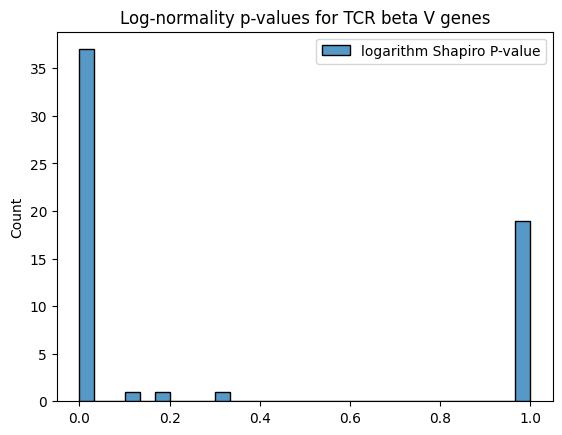

In [32]:
sns.histplot(values, label='logarithm Shapiro P-value', bins=30)
plt.legend()
plt.title('Log-normality p-values for TCR beta V genes')

In [47]:
for gene, pval in gene_to_pval.items():
    if pval < 0.05 / 59:
        print(pval)

1.878918921175668e-14
2.0953653979433458e-16
7.462733555899055e-17
6.168980702631464e-20
7.818119875965566e-21
4.4810232031738406e-17
1.0889525367378276e-10
1.2191702057417737e-20
4.505638987969837e-25
8.88624977800041e-23
1.645517144287093e-28
2.369991018604521e-06
5.421862481292067e-33
3.37800348205927e-07
2.6371683042175493e-07
1.820983667979993e-18
3.7839638412383624e-11
2.104259332765552e-08
9.246907306506307e-12
1.344904992040565e-11
2.4670313003563135e-26
4.401064124550451e-06
8.509818044078613e-23
5.075406182983659e-33
1.0426389317766979e-15
6.409082361398505e-39
1.1180551240953847e-12
1.626494623161162e-14
1.7428868535286107e-16
0.00014492911631919543
3.765461320643598e-23
3.718289044280263e-08
1.011060353632585e-21
1.8936393040091987e-19


/scratch/ipykernel_3103620/114243154.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))


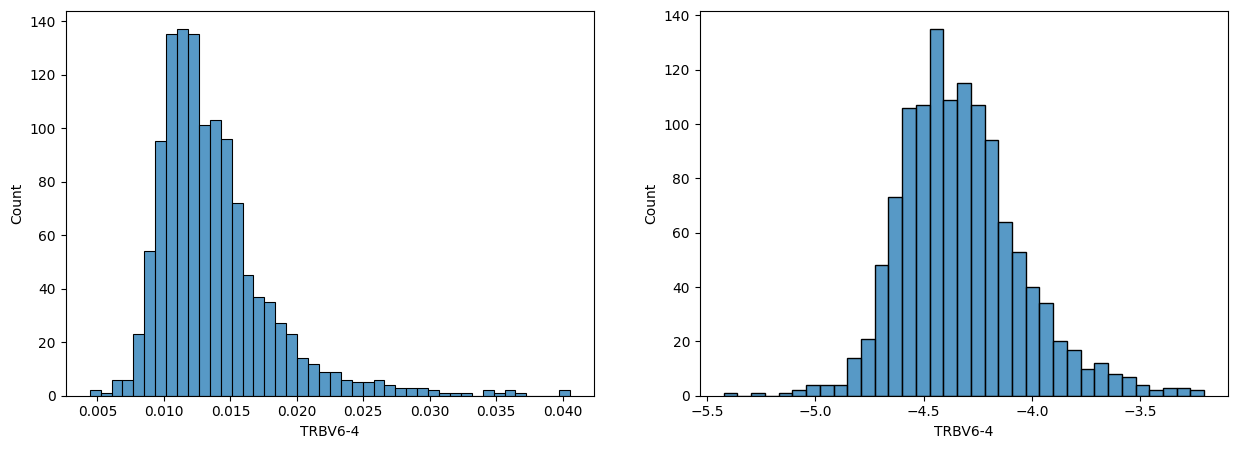

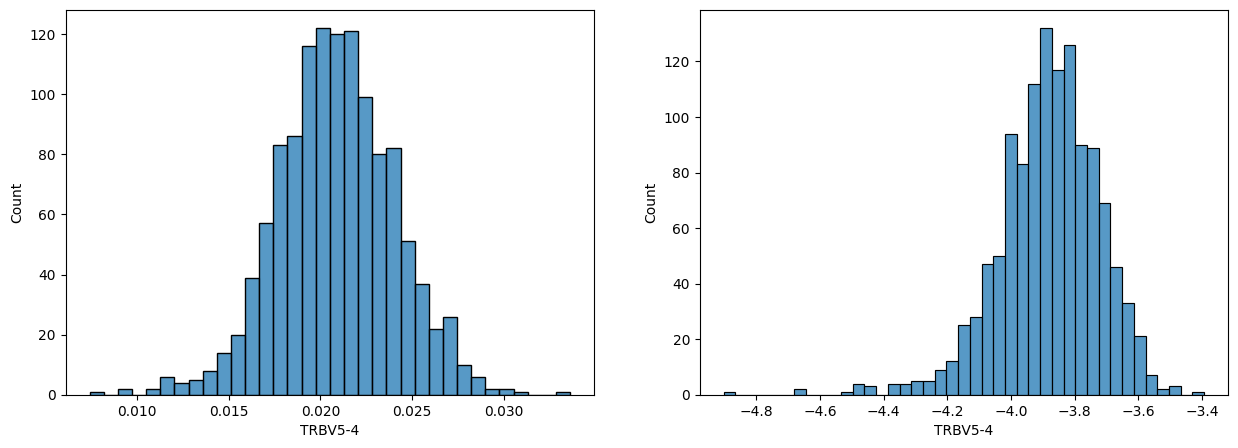

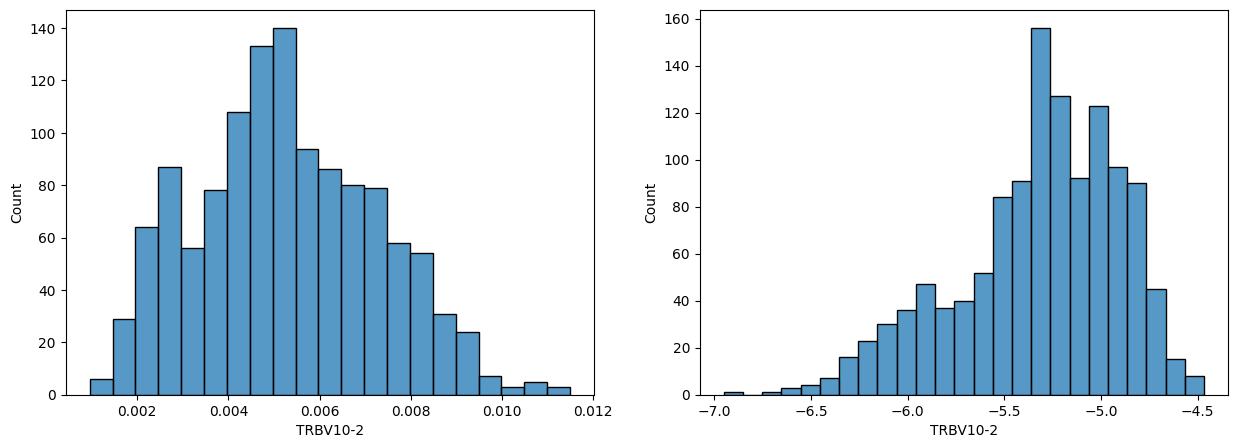

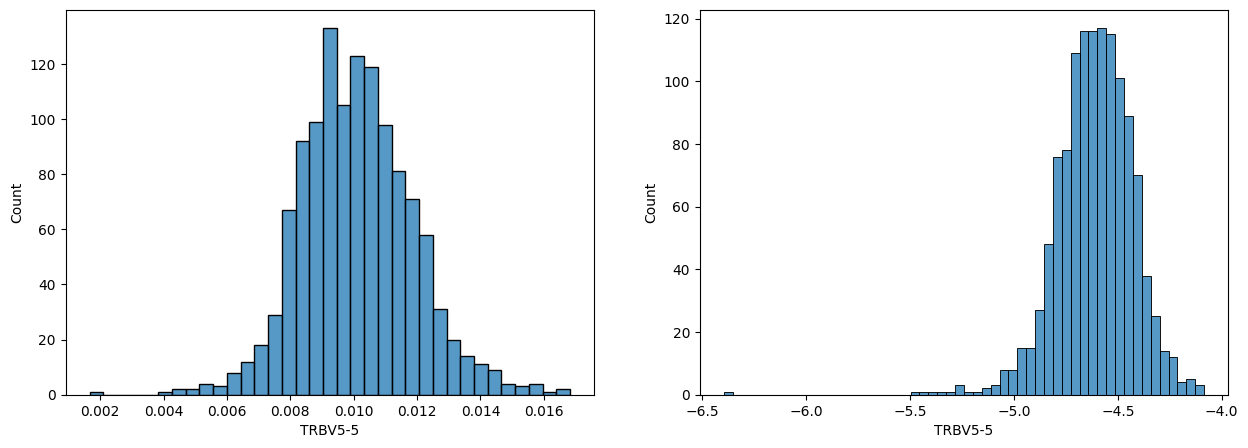

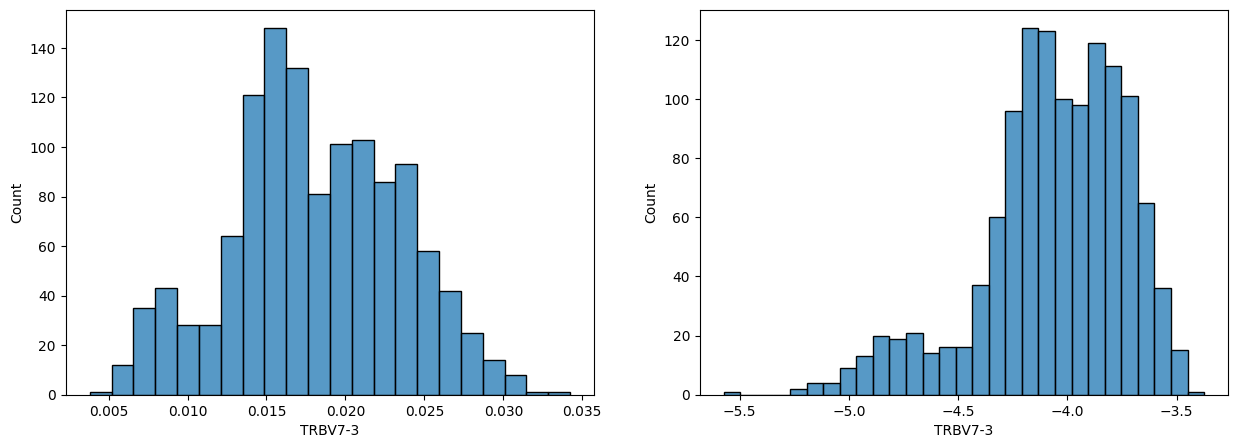

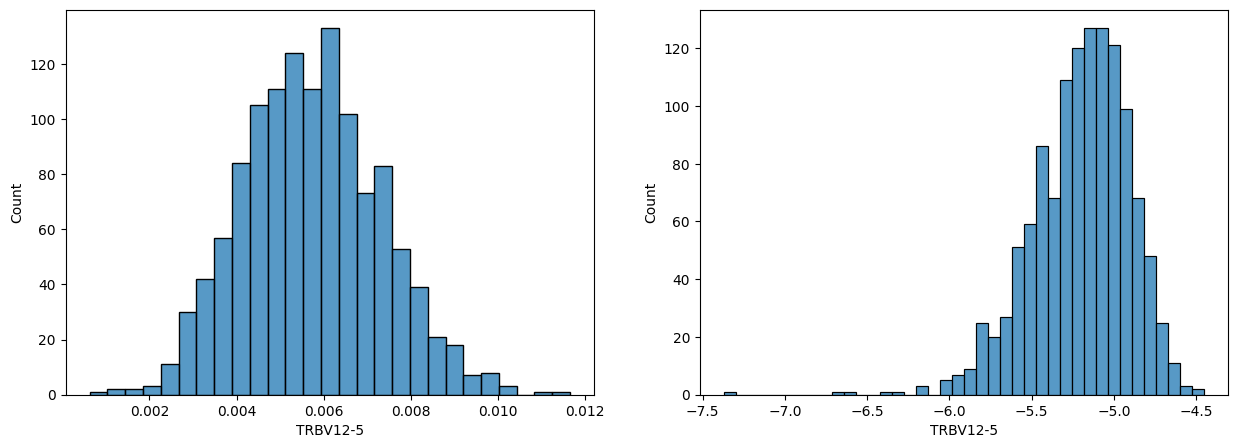

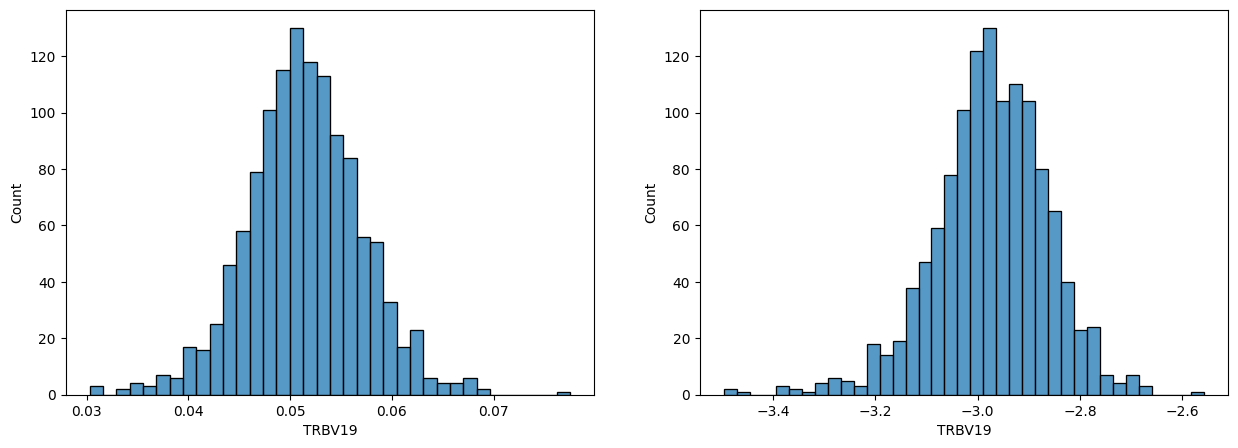

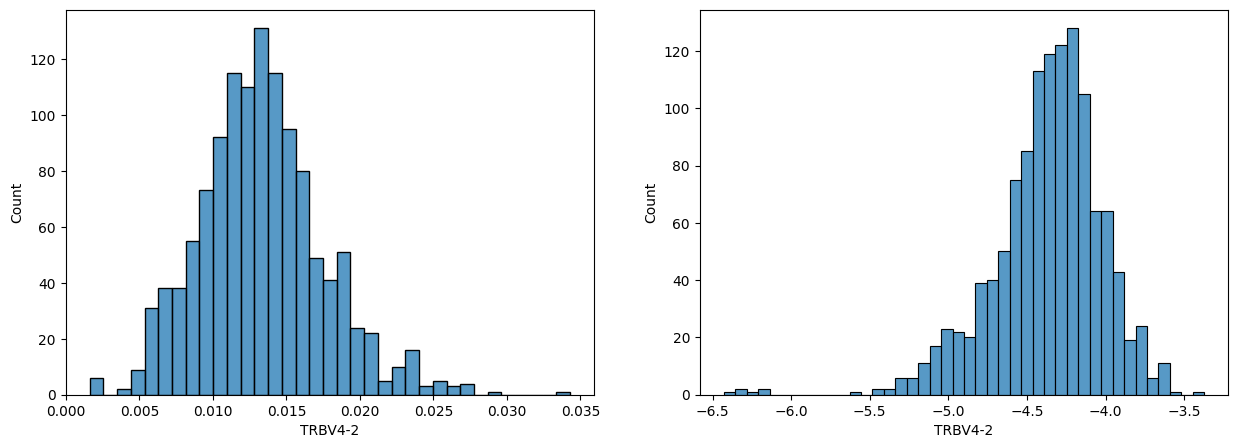

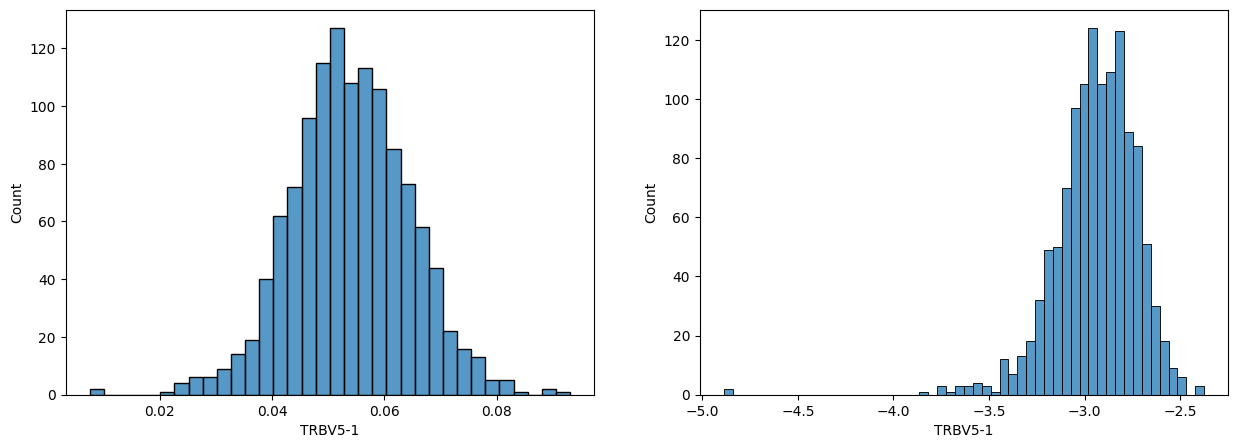

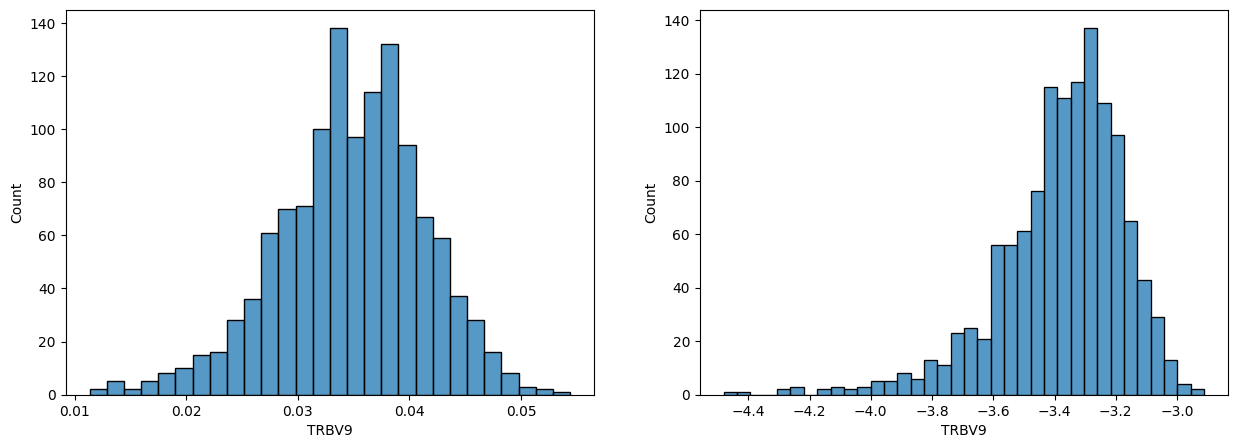

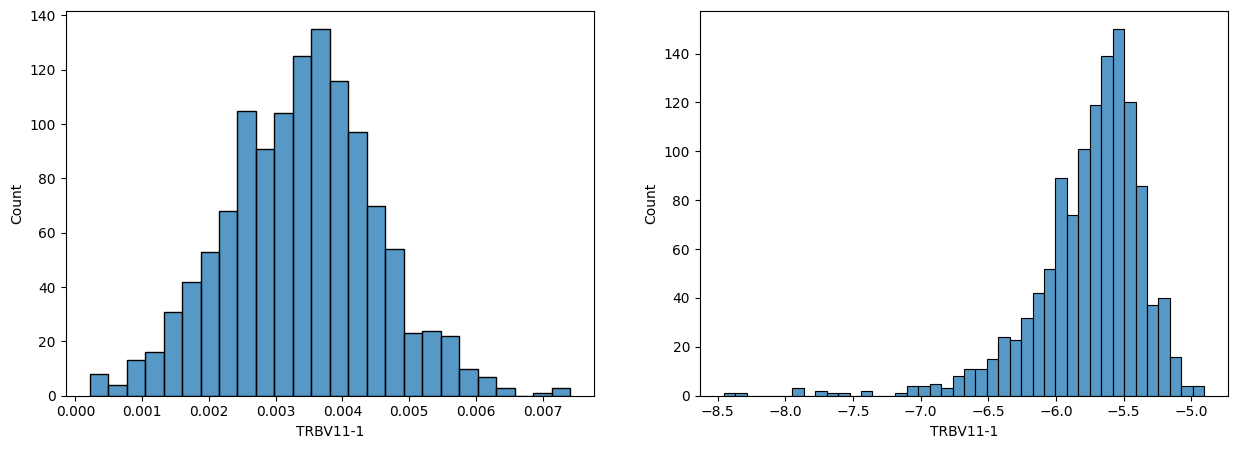

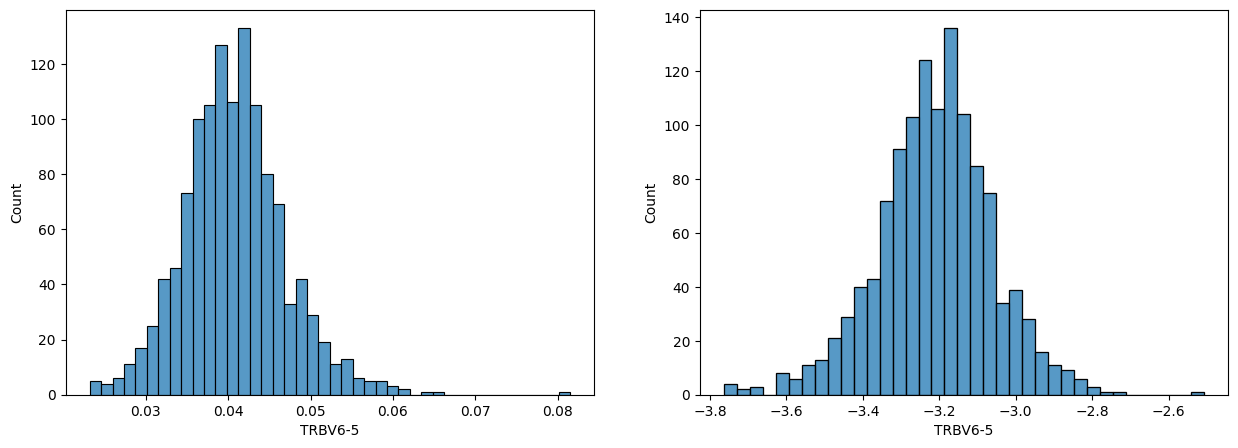

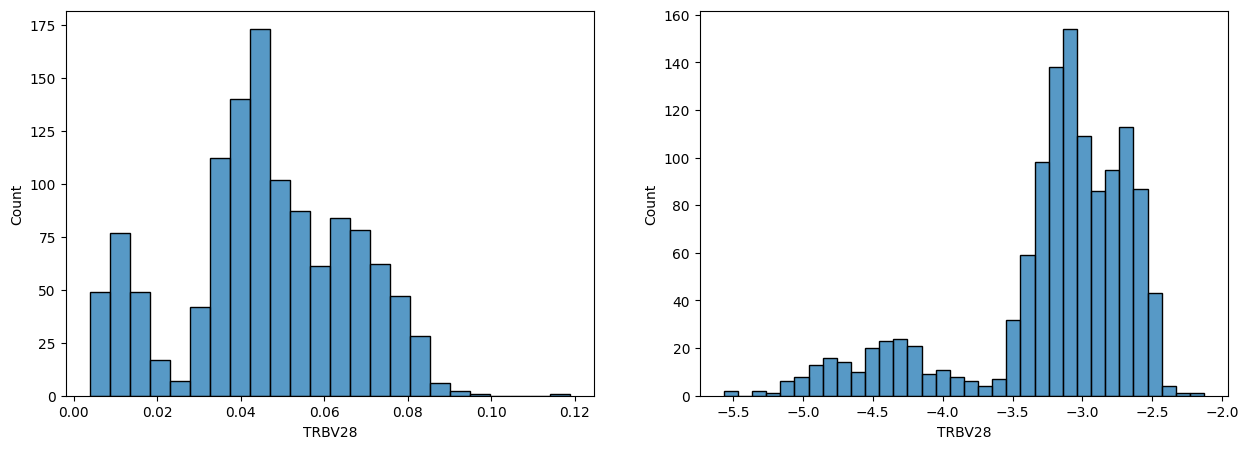

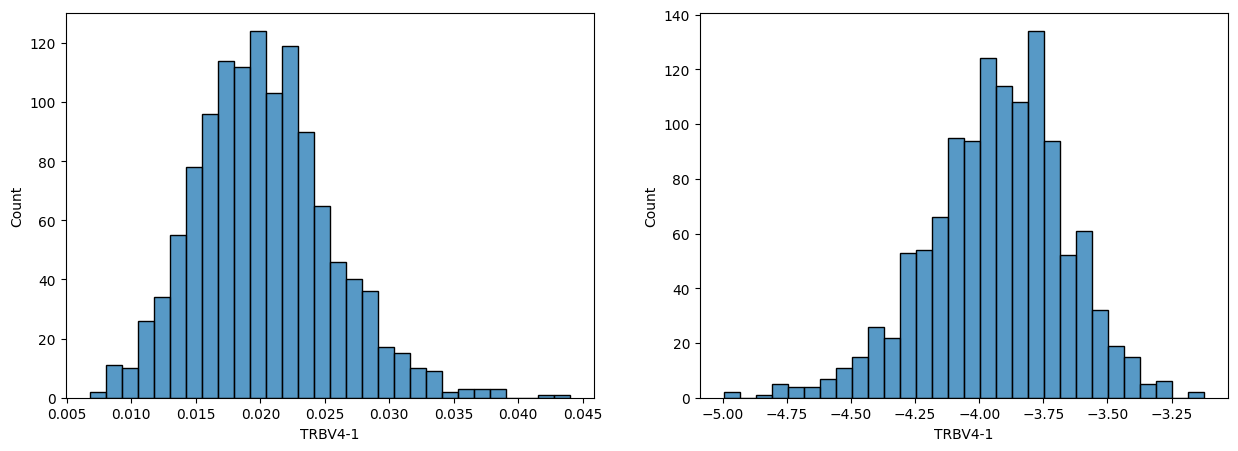

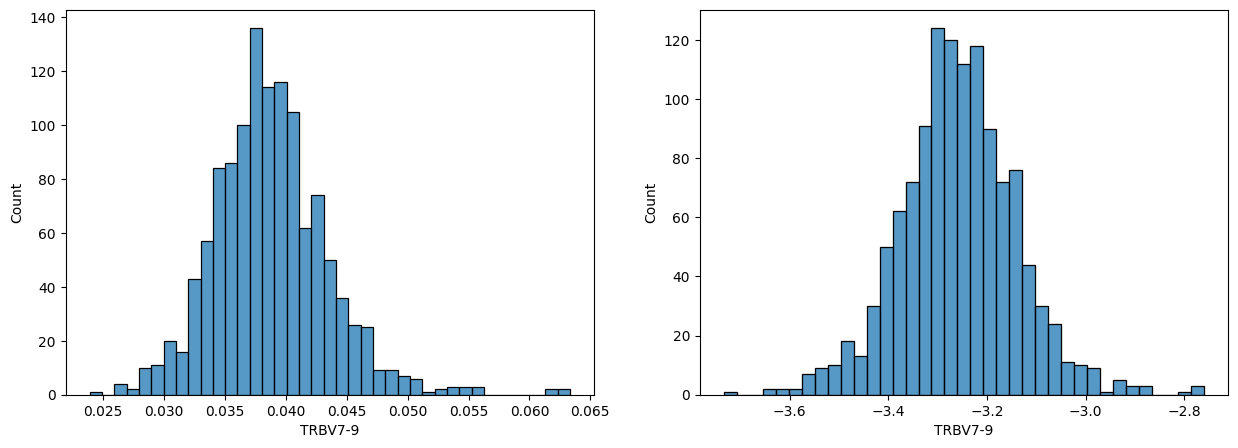

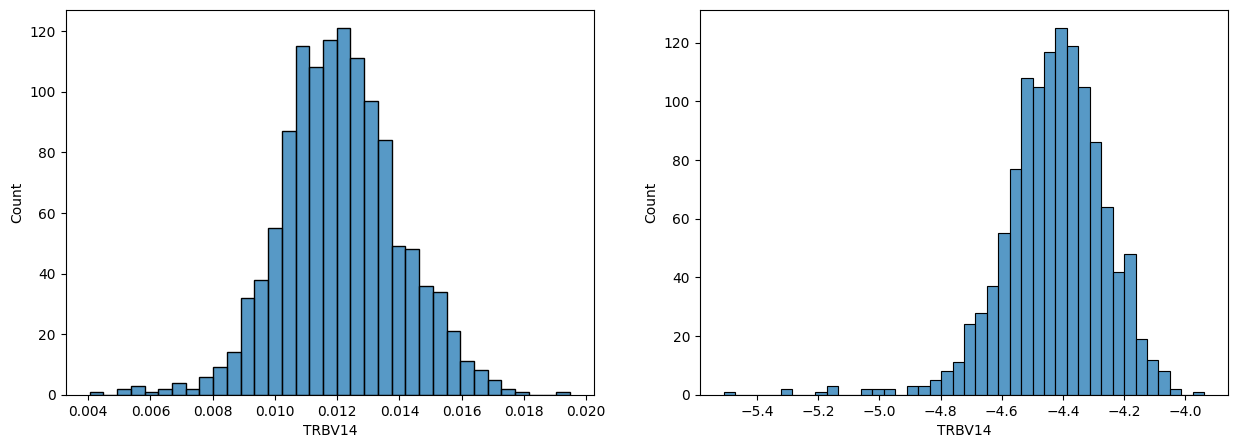

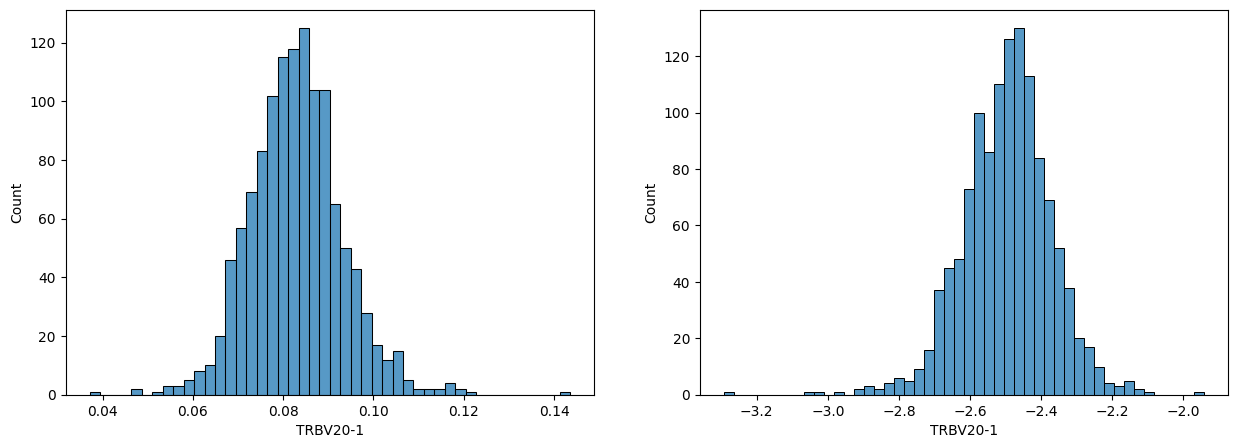

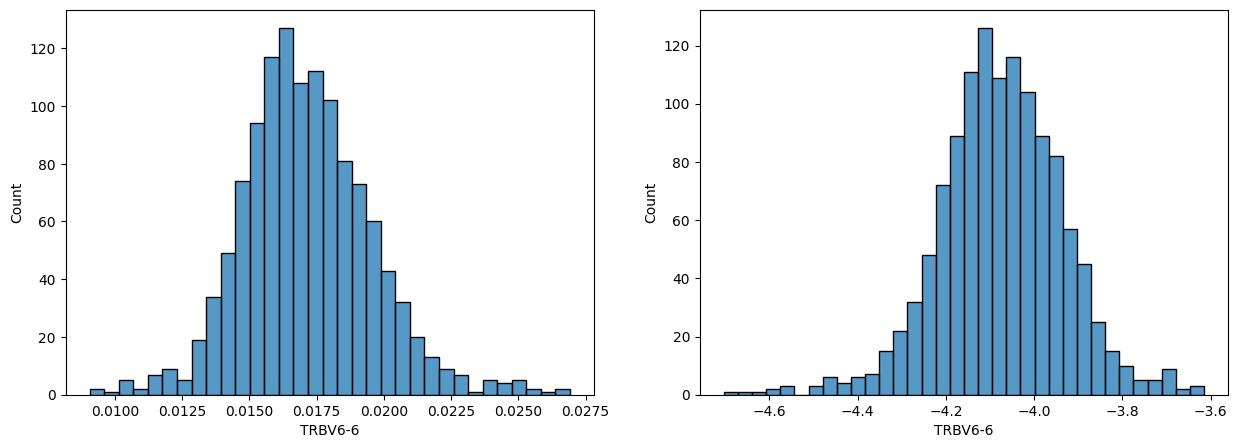

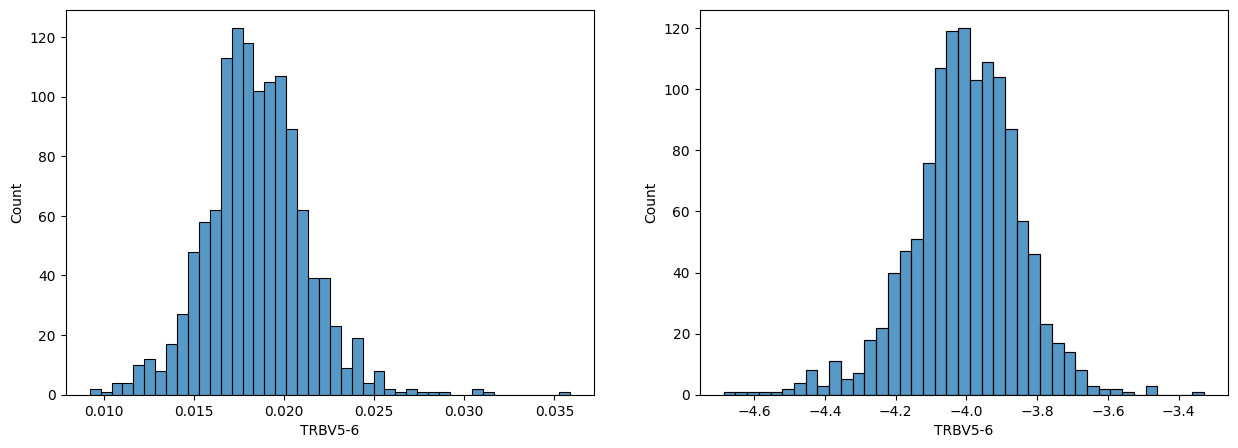

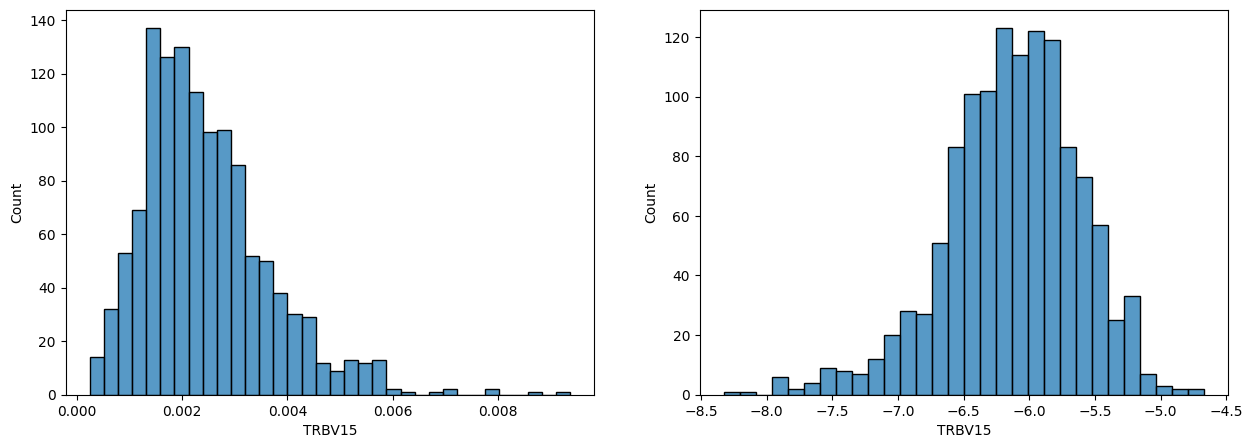

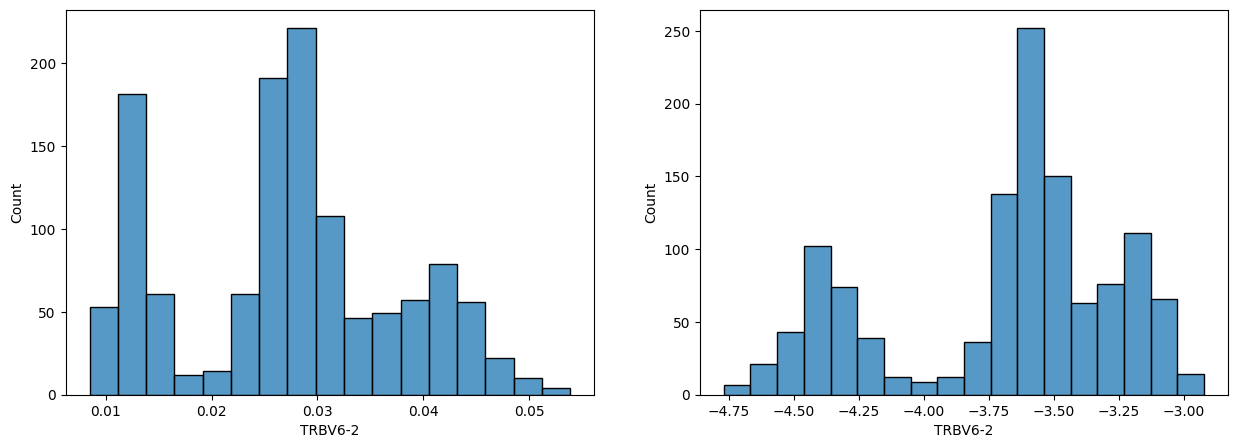

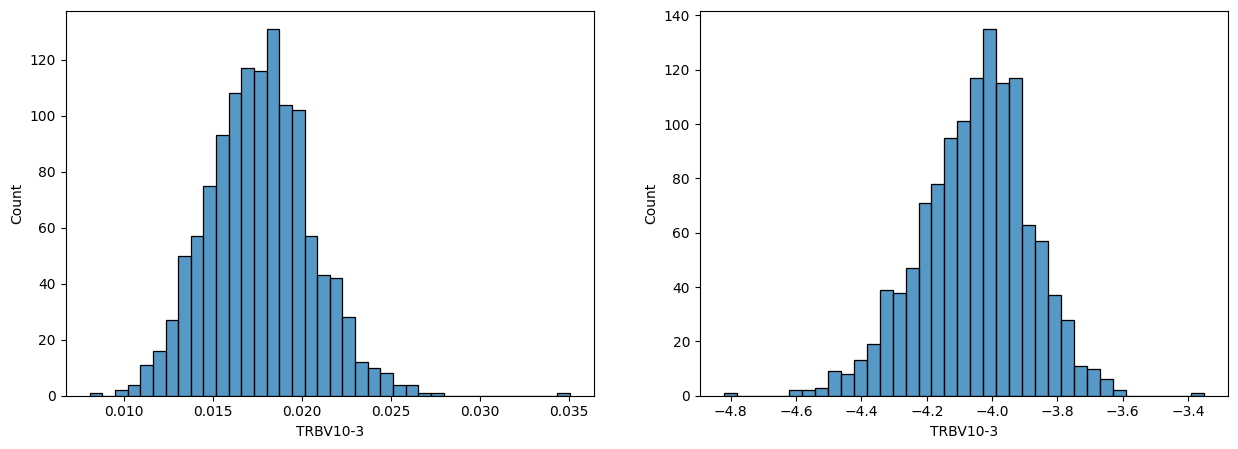

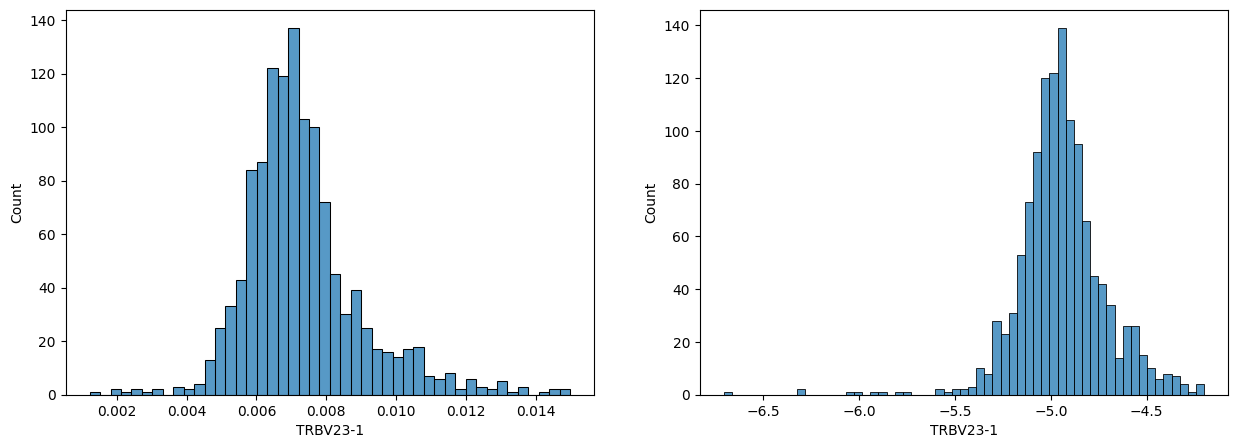

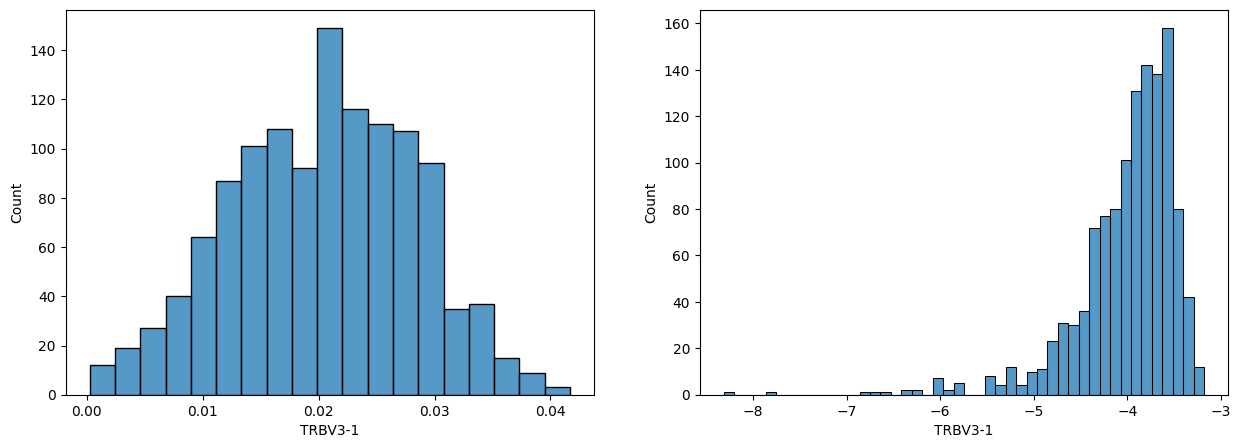

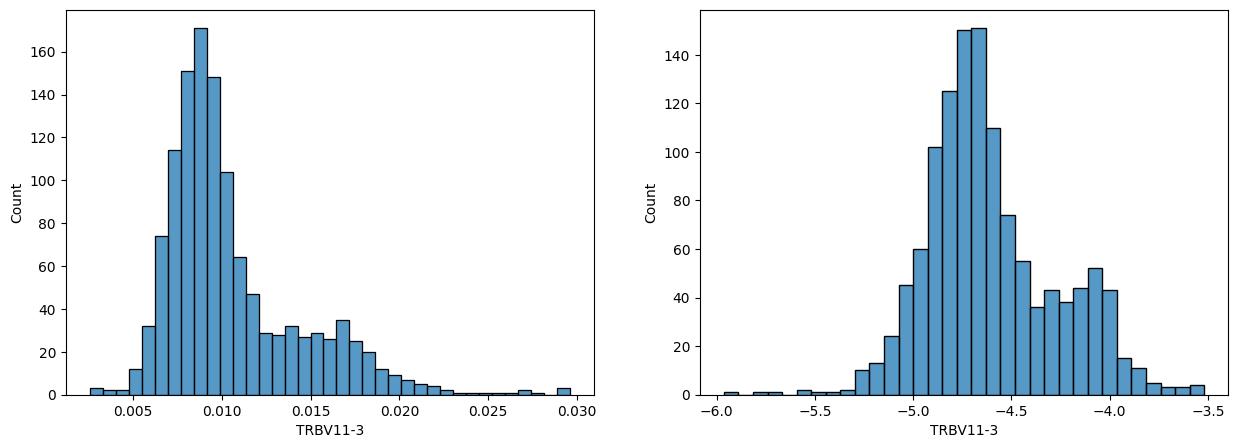

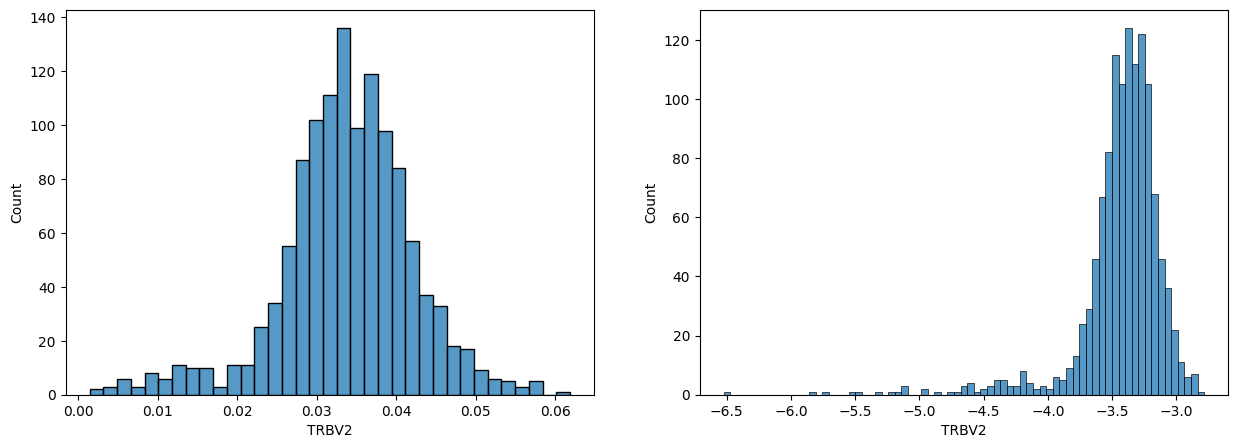

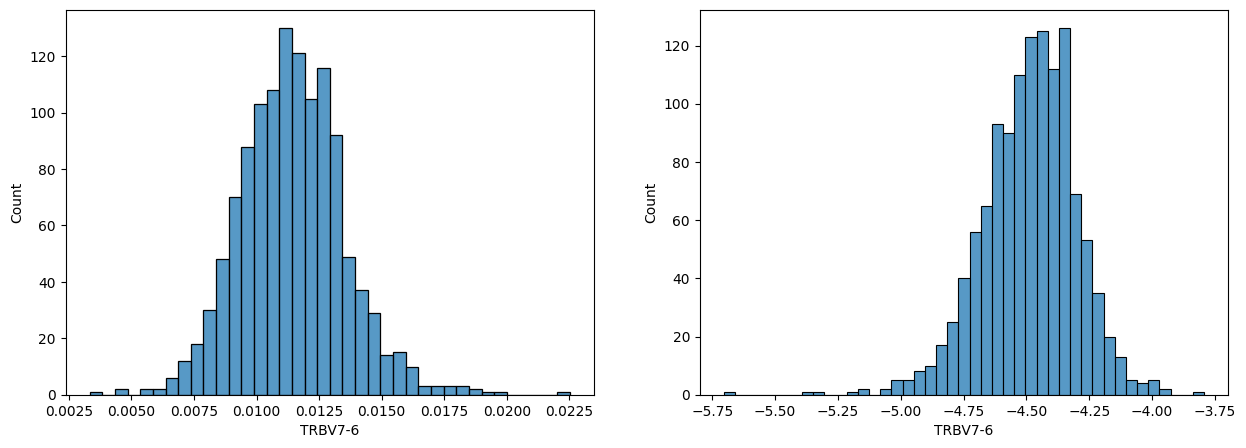

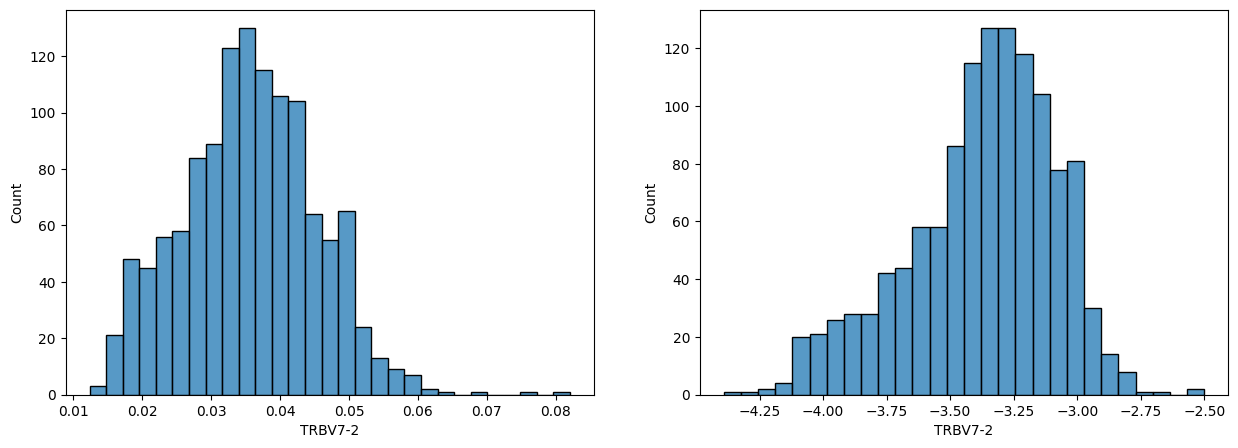

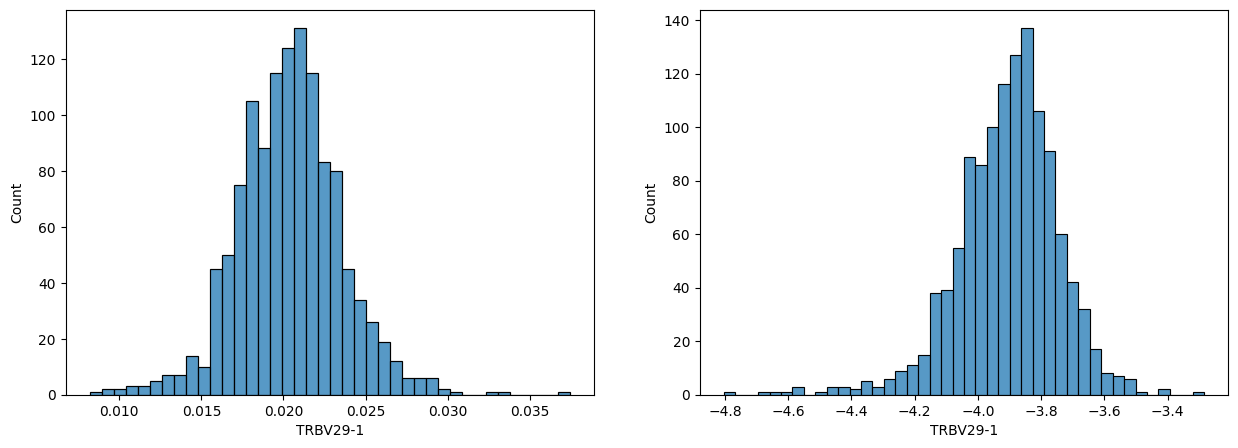

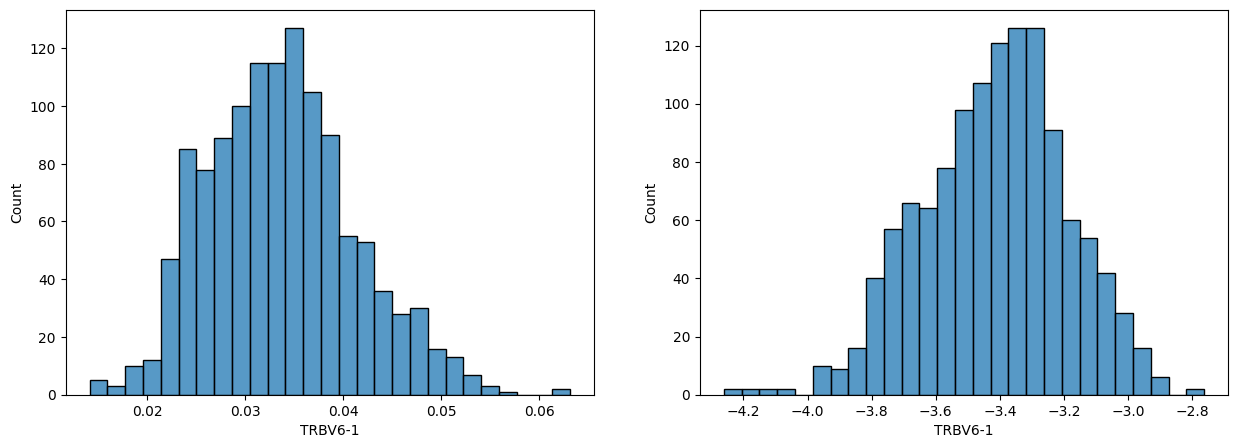

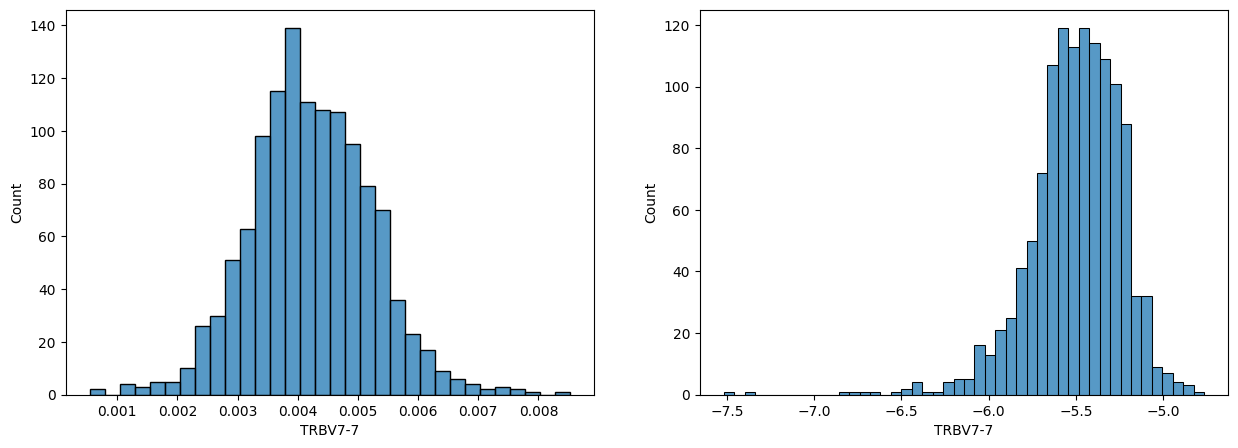

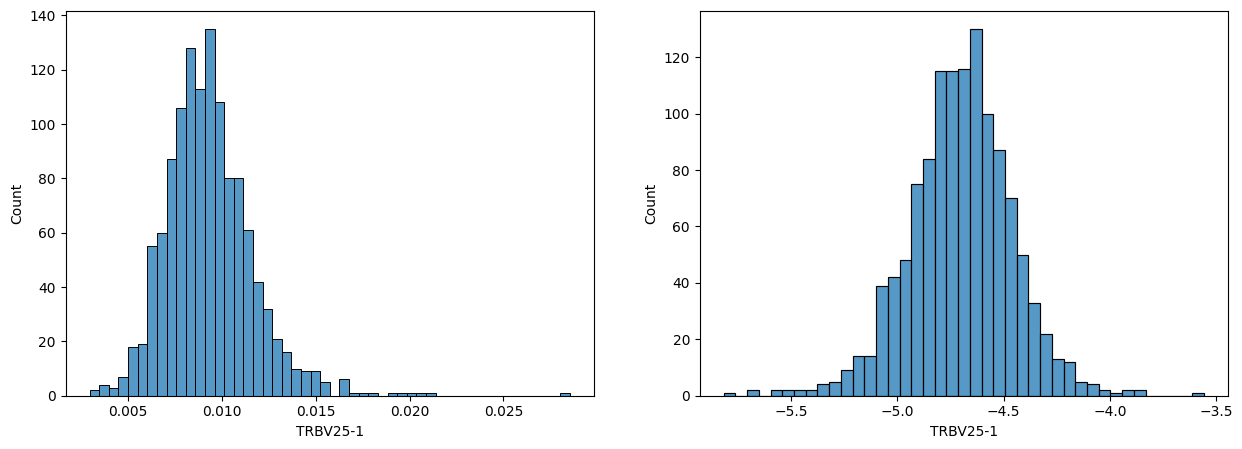

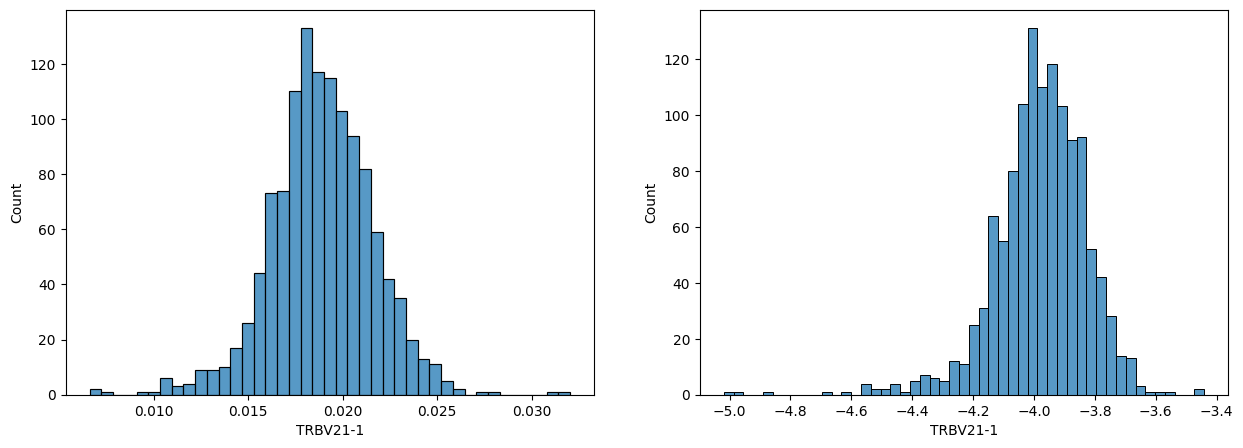

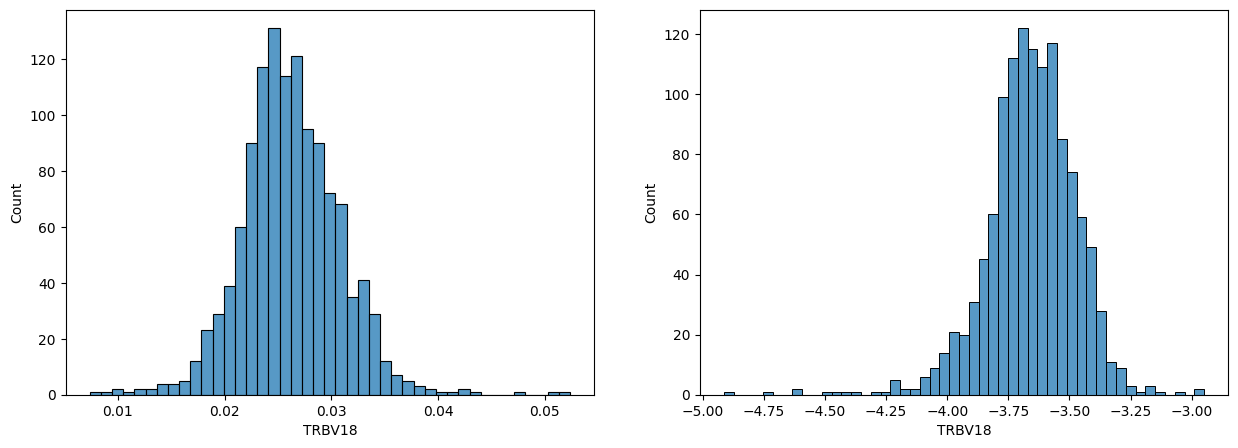

In [46]:
for gene, pval in gene_to_pval.items():
    if pval < 0.05 / 59:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        sns.histplot(um_norm[gene], ax=ax1)        
        sns.histplot(np.log(um_norm[gene]), ax=ax2)